<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_3/swan3.png" height="300" width="300"> 

# <center> R для тервера и матстата. <br>  <br> 4.2 Максимальное правдоподобие, часть первая! </center>

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

---------


Метод максимального правдоподобия - это основная лошадка современной статистики. Функция правдоподобия встречается абсолютно во всех областях от эконометрики и байесовской статистики до нейронных сетей и рекомендательных систем. Из-за этого очень важно как следует понять как она устроена. 

В этой тетрадке именно этим мы и займёмся. Для начала мы попробуем решить в R парочку задачек на метод максимального правдоподобия. Затем мы посмотрим на его поднаготную. Побочным плюсом наших изысканий станет понимание того, что такое информация Фишера и почему она ищется именно так, как ищется. Скорее всего, вас довольно давно будоражит этот вопрос. 

In [17]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

## 1. Задача об эм-энд-эмсинах

Я купил несколько упаковок с конфетками и посчитал как часто в них встречаются жёлтые конфетки и красные конфетки. Распределение конфеток на мой взгляд выглядит следующим образом: 

| X | красная | жёлтая | другой цвет   |
|---|---------|--------|---------------|
|   |  $p_1$  |  $p_2$ |  $1-p_1 - p_2$|

Мы выписали на доске функцию правдоподобия для этой задачки и руками нашли оценки для неизвестных параметров. После мы нашли оценку ковариационной матрицы для этих параметров и поговорили о доверительных интервалах. Конечно же нам было лень обращать матрицу вручную, поэтому мы решили сделать это в R:

In [14]:
# задаем оценку информационной матрицы руками
hat.I <- matrix(c(16/0.16^2+66/0.66^2,66/0.66^2,
                  66/0.66^2,18/0.18^2+66/0.66^2),nrow=2)
hat.I

776.5152,151.5152
151.5152,707.0707


In [15]:
# считаем обратную --- это будет оценка ковариационной матрицы ошибок
hat.Var <- solve(hat.I)
hat.Var

0.001344,-0.000288
-0.000288,0.001476


Это милый результат, но он довольно ручной. Мне бы хотелось теперь проделать все те же изыскания в R от начала до конца. Однако сначала напомню про функции! Обычно, функции в R пишут тогда, когда нужно постоянно выполнять один и тот же кусок кода. Устроена функция как-то так:

In [1]:
# функция лена возводит числа в квадрат
lena <- function(x) {
  return(x^2)
}

lena(7)

[1] 49

В виде точно такой же функции можно записать нашу логарифмическую функцию правдоподобия. 

Она будет зависеть от двух аргументов: выборки и параметров, которые нужно оценить. В дальнейшем нам нужно максимизировать функцию правдоподобия. R умеет минимизировать. Поэтому домножим функцию на $-1$. Минимизируя $-L$, мы максимизируем $L$.

In [4]:
lnL <- function(p,X) {
    ans <- X[1]*log(p[1])+X[2]*log(p[2])+ (100-X[1]-X[2])*log(1-p[1]-p[2])
  return(-ans)
}

Убедимся, что сы сделали всё правильно и возьмём пробу в паре рандомных точек.

In [5]:
lnL(c(0.2,0.5),c(16,18))
lnL(c(0.2,0.3),c(16,18))

[1] 117.6899

[1] 93.17023

Дело за малым! Минимизировать :) 

In [6]:
?nlm  # можно почитать подсказку

In [10]:
# минимизируем минус правдоподобие <=> максимизируем правдоподобие
res <- nlm(lnL,c(1/3,1/3),
            hessian=TRUE,
            X=c(16,18))

Warning message in log(p[1]):
“созданы NaN”Warning message in log(p[2]):
“созданы NaN”Warning message in nlm(lnL, c(1/3, 1/3), hessian = TRUE, X = c(16, 18)):
“NA/Inf заменены максимальным положительным значением”Warning message in log(p[1]):
“созданы NaN”Warning message in log(p[2]):
“созданы NaN”Warning message in nlm(lnL, c(1/3, 1/3), hessian = TRUE, X = c(16, 18)):
“NA/Inf заменены максимальным положительным значением”Warning message in log(p[1]):
“созданы NaN”Warning message in log(p[2]):
“созданы NaN”Warning message in nlm(lnL, c(1/3, 1/3), hessian = TRUE, X = c(16, 18)):
“NA/Inf заменены максимальным положительным значением”

In [11]:
res

775.7836,151.5607
151.5607,706.5021


In [12]:
res$estimate # оценки правдоподобия

[1] 0.1599996 0.1799996

In [13]:
solve(res$hessian) # оценка ковариационной матрицы оценок

0.0013454054,-0.0002886199
-0.0002886199,0.0014773395


Матрицы совпали. Ура! Давайте попробуем теперь сделать то же самое, но при участии пакета, который занимается максимазицей правдоподобия самостоятельно. 

In [20]:
# install.packages('maxLik')  # если пакет не установлен
library('maxLik') # пакет для метода макс. правдоподобия

# Логарифмическое правдоподобие со знаком плюс!
# Грубо говоря, пакет сам домножает на минус единицу.

lnL <- function(p,X) {
    ans <- X[1]*log(p[1])+X[2]*log(p[2])+ (100-X[1]-X[2])*log(1-p[1]-p[2])
  return(ans)
}

res <- maxLik(lnL, start=c(0.1,0.1),X=c(16,18))

summary(res) # краткий отчет о результатах оценивания

# первый столбик --- сами оценки по методу максимального правдоподобия
# второй столбик --- оценки стандартных ошибок
# т.е. корни из диагональных элементов оценённой ковариационной матрицы
# в третьем и четвёртом столбиках проверятся гипотеза о равенстве этих параметров нулю,
# но об этом позже :)

--------------------------------------------
Maximum Likelihood estimation
Newton-Raphson maximisation, 5 iterations
Return code 1: gradient close to zero
Log-Likelihood: -87.61169 
2  free parameters
Estimates:
     Estimate Std. error t value  Pr(> t)    
[1,]  0.16000    0.03666   4.364 1.28e-05 ***
[2,]  0.18000    0.03842   4.685 2.80e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
--------------------------------------------

In [25]:
res$estimate        # оценки
res$hessian         # оценка матрицы Гессе
solve(res$hessian)  # оценка ковариационной матрицы оценок

[1] 0.16 0.18

-776.4953,-151.5161
-151.5161,-707.0611


-0.0013440374,0.0002880138
0.0002880138,-0.0014760235


In [ ]:
# доверительные интервалы к бою! 

## 3. Какое-нибудь непрерывное распределение прям с табличкой с данными 

In [ ]:
x <- c(0.7, 1, 0.8)
x

# demo function
pikachu <- function(a) {
  answer <- sum(a)^2
  return(answer)
}

pikachu(x)

# log likelihood for 12.3c
log_f <- function(theta, data) {
  n <- length(data)
  answer <- n*log(theta) - theta^2/2*sum(1/data)
  return(answer)
}

log_f(1, x)

result <- maxLik(log_f, start=7, data=x)
summary(result)
str(result)

theta_hat <- result$estimate
theta_hat

In [ ]:
### задача 4

set.seed(42)  # установим стартовое значение для генератора случайных чисел
x <- runif(200) # сгенерим 200 равномерных на [0;1]
x[1:5]


# логарифмическая функция правдоподобия для задачи 4 со знаком минус
log_lik <- function(a,dat) {
  n <- length(dat) # количество элементов в векторе dat
  res <- n*log(a) + (a-1)*sum(log(dat))
  return(-res)
}

# считаем для пробы значения нашей функции в некоторых точках
# числа 2 и 5 взяты от фонаря
log_lik(2,x)
log_lik(5,x)

# нелинейная оптимизация
?nlm

opt <- nlm(log_lik,p=5,hessian=TRUE,dat=x)
# p=5 - стартовое значение параметра, от которого R начинает искать экстремум.

a.hat <- opt$estimate # точка минимума функции
a.hat # оценка методом ML

var.hat <- 1/opt$hessian # матрица Гессе в точке минимума функции
var.hat # оценка дисперсии ML оценки


In [ ]:
########## 5

# генерим искусственные данные
x <- rnorm(200,mean=4,sd=3)

# функция правдоподобия зависит от двух параметров и вектора данных
# param - вектор из двух параметров
# data - вектор данных
log_lik <- function(param,data) {
  mu <- param[1]
  s2 <- param[2]
  n <- length(data)
  result <- -n/2*log(2*pi)-n/2*log(s2)-sum((data-mu)^2)/(2*s2)
  return(-result)
}

log_lik(c(3,5),x)

# результаты оптимизации
optimum <- nlm(log_lik,p=c(0,1),hessian=TRUE,data=x)
optimum

# вектор оценок неизвестных параметров
theta.hat <- optimum$estimate

# матрица Гессе в точке оптимума
H <- optimum$hessian
print(H,digits=2)

# оценка ковариационной матрицы - это обратная матрица к матрице Гессе
var.theta <- solve(H) 

# стандартные отклонения - это корни из диагональных элементов
st.devs <- sqrt(diag(var.theta))
st.devs
z.cr

ci.left <- theta.hat - z.cr*st.devs
ci.right <- theta.hat + z.cr*st.devs

ci.left
ci.right

In [ ]:

# download file
# http://goo.gl/TKgzBk

# Session - Set working directory - Choose
setwd("~/Downloads/")

h <- read.csv("coal.csv")
h
head(h)
y <- h$count
y


# help(maxLik)

# poisson model for data
log_f <- function(lambda, data) {
  n <- length(data)
  answer <- -lambda*n+log(lambda)*sum(data)
  return(answer)
}

log_f(1, y)
log_f(2, y)

result <- maxLik(log_f, start=2, data=y)
summary(result)

lambda_hat <- result$estimate
lambda_hat

# geometric distribution model for data
log_f2 <- function(p, data) {
  n <- length(data)
  answer <- sum(data)*log(1-p)+log(p)*n
  return(answer)
}

log_f2(0.5, y)

result2 <- maxLik(log_f2, start=0.2, data=y)
summary(result2)
p_hat <- result2$estimate
p_hat

# forecast of P(Y=1)
(1-p_hat)*p_hat
exp(-lambda_hat)*lambda_hat

# forecast of P(Y=f) for f=0,1...5
f <- 0:5
f

prognoz_1 <- exp(-lambda_hat)*
  lambda_hat^f/factorial(f)
prognoz_2 <- (1-p_hat)^f*p_hat
prognoz_1
prognoz_2

## 3. Пытаемся прочувствовать функцию правдоподобия на картинках

Пришло время формул! Итак, пусть в нашем распоряжении оказалась выборка $x_1, \ldots x_n$. Пусть мы предположили, что эту выбору на нас из сундука выплюнула случайная величина с плотностью распределения $f(x \mid \theta)$. Про параметр $\theta$ нам ничего не известно и мы хотели бы оценить его по выборке. 

Запишем правдоподобие наших данных, то есть вероятность пронаблюдать именно эту выборку: 

$$L( \theta \mid x_1, \ldots, x_n) = f(x_1, \ldots, x_n \mid \theta) = \prod_{i=1}^n f(x_i \mid \theta)$$

Наша выборка - фиксирована. При разных значениях $\theta$ мы получаем большую или меньшую вероятность получить выборку близку к наблюдаемой. Было бы круто найти такое значение $\theta$, для которого эта вероятность оказалась бы максимальной. 

Обратите внимание, что функцию $L( \theta \mid x_1, \ldots, x_n)$ уже нельзя трактовать как плотность распределения. Параметр $\theta$ здесь не рассматривается как случайная величина, он фиксирован. Интеграл $L( \theta \mid x_1, \ldots, x_n)$ по всем возможным значениям $\theta$ не будет равен единице. 

Для максимизации правдоподобия нам придётся брать производные. Куда приятнее их брать от логарифма, потому что все произведения превратятся в суммы и жить станет проще. Выпишем логарифм правдоподобия:

$$
\ln L( \theta \mid x_1, \ldots, x_n) =  \sum_{i=1}^n \ln f(x_i \mid \theta).
$$

Берём производную и приравниваем её к нулю. 

$$
\frac{\partial \ln L}{\partial \theta} = \sum_{i=1}^n \frac{\partial \ln f(x_i \mid \theta)}{\partial \theta} = 0
$$

Решив это уравнение мы получим оценку максимального правдоподобия. 


Посмотрим на одно слагаемое $\ln f(x_i \mid \theta)$. Его можно интерпретировать как логарифм правдоподобия, посчитанного на основании только одного наблюдения $x_i$.

Когда у нас в выборке появляются новые наблюдения, к нашей функции плюсуется дополнительное слагаемое. Интересно было бы посмотреть на то, как при этом функция изменяется. 

У нас есть R. Сгенерируем выборку объёма $5$ из нормального стандартного распределения и посмотрим. 

In [20]:
x <- rnorm(5)
x

[1] -0.8045813 -0.5800900  0.8349183  1.7636619  0.4603589

Выпишем для нормального распределения логарифмическую функцию правдоподобия. Она будет зависеть от двух векторов: выборки и параметров.

$$
\ln L(\mu, \sigma^2 \mid x) = 
$$


Предположим, что $\sigma$ известна и нам хочется оценить только $\mu$. Перебьём такую функцию в R.

In [39]:
# mu - оцениваемый параметр
# data - вектор данных

log_lik <- function(mu,data) {
  n <- length(data)
  result <- -n/2*log(2*pi)-n/2*log(1)-sum((data-mu)^2)/(2*1)
  return(result)
}

Найдём значение нашей функции в какой-нибудь точке чисто ради фана.

In [29]:
log_lik(1,x)
log_lik(10,x)

[1] -7.922114

[1] -240.3537

Посмотрим как функция выглядит на картинке.

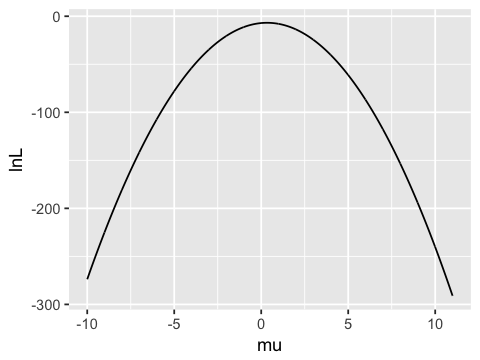

In [46]:
mu  = seq(-10,11,0.01)
lnL = rep(0,length(mu))

for(i in 1:length(lnL)){
    lnL[i] = log_lik(mu[i],x)
}

qplot(mu, lnL, geom='line')

Выглядит прелестно. Её максимум достигается в районе нуля, но не чётко в нуле. Построим такие же функции для отдельных наблюдений. 

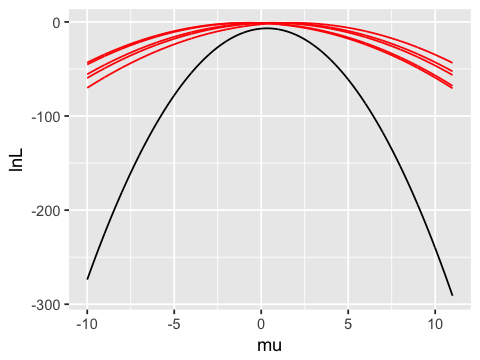

In [57]:
mu  = seq(-10,11,0.01)

lnL = rep(0,length(mu))
lnL1 = rep(0,length(mu))
lnL2 = rep(0,length(mu))
lnL3 = rep(0,length(mu))
lnL4 = rep(0,length(mu))
lnL5 = rep(0,length(mu))

for(i in 1:length(lnL)){
    lnL[i] = log_lik(mu[i],x)
    lnL1[i] = log_lik(mu[i],x[1])
    lnL2[i] = log_lik(mu[i],x[2])
    lnL3[i] = log_lik(mu[i],x[3])
    lnL4[i] = log_lik(mu[i],x[4])
    lnL5[i] = log_lik(mu[i],x[5])
}

df_L = data.frame(mu=mu,lnL = lnL, lnL1 = lnL1, lnL2 = lnL2,
                  lnL3 = lnL3,lnL4 = lnL4,lnL5 = lnL5)

ggplot(df_L, aes(x=mu))+
    geom_line(aes(y=lnL))+
    geom_line(aes(y=lnL1),color='red')+
    geom_line(aes(y=lnL2),color='red')+
    geom_line(aes(y=lnL3),color='red')+
    geom_line(aes(y=lnL4),color='red')+
    geom_line(aes(y=lnL5),color='red')

Черная функция для всей выборки равна сумме логарифмических правдоподобий для отдельных наблюдений (красные линии). Она имеет более выраженный максимум по сравнению с логарифмическими функциями для отдельных наблюдений. 

Можно построить аналогичную картинку, на которой мы будем постепенно накапливать наблюдения внутри нашей суммы. При добавлении всё новых слагаемых, максимум будет становиться более чётким. 

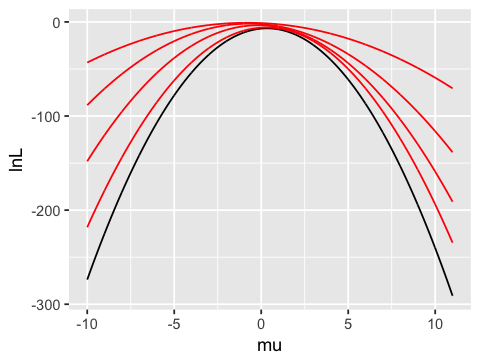

In [59]:
mu  = seq(-10,11,0.01)

lnL = rep(0,length(mu))
lnL1 = rep(0,length(mu))
lnL2 = rep(0,length(mu))
lnL3 = rep(0,length(mu))
lnL4 = rep(0,length(mu))
lnL5 = rep(0,length(mu))

for(i in 1:length(lnL)){
    lnL[i] = log_lik(mu[i],x)
    lnL1[i] = log_lik(mu[i],x[1])
    lnL2[i] = log_lik(mu[i],x[1:2])
    lnL3[i] = log_lik(mu[i],x[1:3])
    lnL4[i] = log_lik(mu[i],x[1:4])
}

df_L = data.frame(mu=mu,lnL = lnL, lnL1 = lnL1, lnL2 = lnL2,
                  lnL3 = lnL3,lnL4 = lnL4)

ggplot(df_L, aes(x=mu))+
    geom_line(aes(y=lnL))+
    geom_line(aes(y=lnL1),color='red')+
    geom_line(aes(y=lnL2),color='red')+
    geom_line(aes(y=lnL3),color='red')+
    geom_line(aes(y=lnL4),color='red')

Итак, чем более выпукла функция, тем более выражен максимум, тем более сильно мы уверенны в том, что оценка параметра была найдена хорошо.

Что отвечает за выпуклость функции? Правильно! Вторая производная. Именно её, взятую со знаком минус, интерпретируют как наблюдённую информацию.  

$$
I_o(\theta) =  - \left( \frac{\partial^2 \ln L}{\partial \theta^2}  \right)
$$

Почему со знаком минус? Потому что у нас максимум, в точке максимума вторая производная отрицательна. А информация должна быть положительной. Если параметр векторный, то в этом случае наблюдэнная информация представляется наблюдённой информационной матрицей: 

$$
I_o(\theta) =  - \left( \frac{\partial^2 \ln L}{\partial \theta_i \partial \theta_j}  \right) = - H
$$

Индекс o в данном случае обозначает observed, информацию, которую мы реально видели. В матрице на во всех клетках стоят числа. Они зависят от конкретных значений наблюдений. 

Обратите внимание, что на первой картинке, правдоподобия, построенные для разных наблюдений выпуклы по разному. Получается, что каждое наблюдение вносит в заострённость нашего правдоподобия разный вклад, то есть в каждом наблюдении содержится разное количество информации. 

Математическое ожидание этой матрицы по распределению $x$ называется информационной матрицей Фишера. 

$$
I(\theta) =  - E\left( \frac{\partial^2 \ln L}{\partial \theta_i \partial \theta_j}  \right) = -E(H)
$$

Ожидаемая информация зависит только от закона распределения наблюдений. Она отражает то, какую информацию в среднем вносит в наше правдоподобие, каждое наблюдение. 

Если функция плотности $f(x \mid \theta)$ удовлетворяет условиям регулярности, то тогда для любой несмещённой оценки $\hat \theta$ выполняется неравенство Рао-Фреше-Крамера: 

$$
Var(\hat \theta) \ge [I(\theta)]^{-1}
$$

Более того, в этом случае 

$$
I(\theta) =  E\left( \frac{\partial^2 \ln L}{\partial \theta^2}  \right) = E\left[ \left( \frac{\partial \ln L}{\partial \theta} \right)^2  \right],
$$

но доказывать это здесь, мы конечно же не будем. 

При тех же условиях регулярности, оценка максимального правдоподоия обладает набором приятных асимптотических свойств: 

1. Состоятельность 
2. Асимптотическая несмещённость
3. Асимптотическая эффективность
4. Асимптотическая нормальность: 

$$
\hat \theta \to N(\theta, I(\theta)^{-1}) 
$$


Асимптотическую нормальность обычно используют на практике для строительства доверительных интервалов и проверки гипотез. Чтобы сделать это, yужно найти подходящую оценку для информации Фишера, посчитанную на основе выборки. 

Обычно поступают двумя путями: либо заменяют в матрице Гессе, $-H$, все $\theta$ на оценки, либо заменяют в матрице $-E(H)$ все $\theta$ на оценки. Именно так мы с вами поступили выше, решая задачки.